### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [17]:
data = boston.data
target = boston.target
feature_names = boston.feature_names
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ['price'])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [28]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [30]:
from sklearn.manifold import TSNE

In [35]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

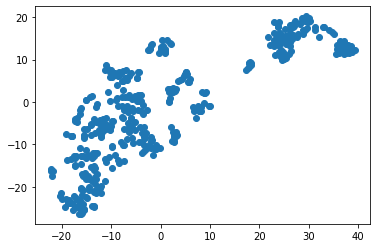

In [36]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [44]:
train_labels = kmeans.fit_predict(X_train_scaled)
train_labels[:10]

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1])

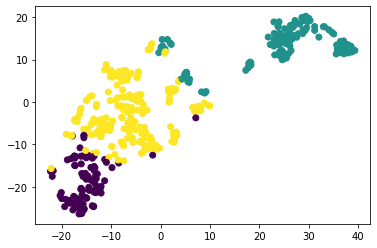

In [53]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

In [70]:
mean_crime_cluster = X_train.loc[train_labels==0, 'CRIM'].mean(), X_train.loc[train_labels==1, 'CRIM'].mean(), X_train.loc[train_labels==2, 'CRIM'].mean()
mean_crime_cluster

(0.07356558139534886, 10.797028425196853, 0.42166020942408367)

In [80]:
mean_price_cluster = y_train.loc[train_labels==0, 'price'].mean(), y_train.loc[train_labels==1, 'price'].mean(), y_train.loc[train_labels==2, 'price'].mean()
mean_price_cluster

(27.788372093023252, 16.165354330708666, 24.958115183246072)

In [84]:
crime = pd.DataFrame(mean_crime_cluster, columns = ['mean_crime_cluster'])
crime

,mean_crime_cluster
0,0.073566
1,10.797028
2,0.421660


In [95]:
price = pd.DataFrame(mean_price_cluster, columns = ['mean_price_cluster'])
price

,mean_price_cluster
0,27.788372
1,16.165354
2,24.958115


### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


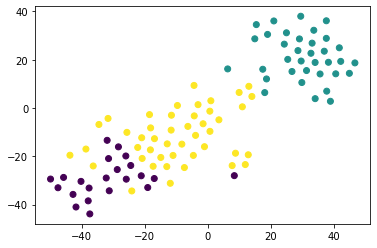

In [107]:
test_labels = kmeans.predict(X_test_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne.shape
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)

In [114]:
mean_crime_cluster_test = X_test.loc[test_labels==0, 'CRIM'].mean(), X_test.loc[test_labels==1, 'CRIM'].mean(), X_test.loc[test_labels==2, 'CRIM'].mean()
mean_crime_cluster_test

(0.07985181818181818, 10.165531142857143, 0.2845831111111111)

In [116]:
mean_price_cluster_test = y_test.loc[test_labels==0, 'price'].mean(), y_test.loc[test_labels==1, 'price'].mean(), y_test.loc[test_labels==2, 'price'].mean()
mean_price_cluster_test

(28.413636363636364, 16.437142857142856, 22.031111111111112)

In [117]:
crime_test = pd.DataFrame(mean_crime_cluster_test, columns = ['mean_crime_cluster_test'])
crime_test

,mean_crime_cluster_test
0,0.079852
1,10.165531
2,0.284583


In [118]:
price_test = pd.DataFrame(mean_price_cluster_test, columns = ['mean_price_cluster_test'])
price_test

,mean_price_cluster_test
0,28.413636
1,16.437143
2,22.031111


In [ ]:
# покажите, пожалуйста, как объединить price_test и crime_test. Допускаю какие-то ошибки в синтаксисе, не могу понять.